In [1]:
#Import Essential Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the dataset
data1=pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\to replicate\Credit Risk using ML\Loan_Data.csv")
data1

,Cust_Id,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Hyderabad,22,0,4425000,RENT,123.0,PERSONAL,D,2625000,16.02,1,Y,3
1,2,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
2,3,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
3,4,Hyderabad,23,1,4912500,RENT,4.0,MEDICAL,C,2625000,15.23,1,N,2
4,5,Delhi,24,1,4080000,RENT,8.0,MEDICAL,C,2625000,14.27,1,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32577,Hyderabad,57,0,3975000,MORTGAGE,1.0,PERSONAL,C,435000,13.16,0,N,30
32577,32578,Hyderabad,54,0,9000000,MORTGAGE,4.0,PERSONAL,A,1321875,7.49,0,N,19
32578,32579,Hyderabad,65,0,5700000,RENT,3.0,HOMEIMPROVEMENT,B,2625000,10.99,1,N,28
32579,32580,Hyderabad,56,1,11250000,MORTGAGE,5.0,PERSONAL,B,1125000,11.48,0,N,26


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cust_Id          32581 non-null  int64  
 1   Location         32581 non-null  object 
 2   Age              32581 non-null  int64  
 3   Car Ownership    32581 non-null  int64  
 4   Income           32581 non-null  int64  
 5   Home Type        32581 non-null  object 
 6   Job Experience   31686 non-null  float64
 7   Loan Purpose     32581 non-null  object 
 8   Loan Grade       32581 non-null  object 
 9   Loan Balance     32581 non-null  int64  
 10  Interest Rate    29465 non-null  float64
 11  loan_status      32581 non-null  int64  
 12  Default History  32581 non-null  object 
 13  Credit History   32581 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 3.5+ MB


In [7]:
# Drop the customar id column because it is not necessary for our analysis
data1.drop("Cust_Id",axis=1,inplace=True)
data1

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,Hyderabad,22,0,4425000,RENT,123.0,PERSONAL,D,2625000,16.02,1,Y,3
1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
3,Hyderabad,23,1,4912500,RENT,4.0,MEDICAL,C,2625000,15.23,1,N,2
4,Delhi,24,1,4080000,RENT,8.0,MEDICAL,C,2625000,14.27,1,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,Hyderabad,57,0,3975000,MORTGAGE,1.0,PERSONAL,C,435000,13.16,0,N,30
32577,Hyderabad,54,0,9000000,MORTGAGE,4.0,PERSONAL,A,1321875,7.49,0,N,19
32578,Hyderabad,65,0,5700000,RENT,3.0,HOMEIMPROVEMENT,B,2625000,10.99,1,N,28
32579,Hyderabad,56,1,11250000,MORTGAGE,5.0,PERSONAL,B,1125000,11.48,0,N,26


In [8]:
#Check if there is som missing values there
data1.isnull()

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#Drop our missing values
data2 = data1.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         28638 non-null  object 
 1   Age              28638 non-null  int64  
 2   Car Ownership    28638 non-null  int64  
 3   Income           28638 non-null  int64  
 4   Home Type        28638 non-null  object 
 5   Job Experience   28638 non-null  float64
 6   Loan Purpose     28638 non-null  object 
 7   Loan Grade       28638 non-null  object 
 8   Loan Balance     28638 non-null  int64  
 9   Interest Rate    28638 non-null  float64
 10  loan_status      28638 non-null  int64  
 11  Default History  28638 non-null  object 
 12  Credit History   28638 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 3.1+ MB


# Outliers Detection & Treatment

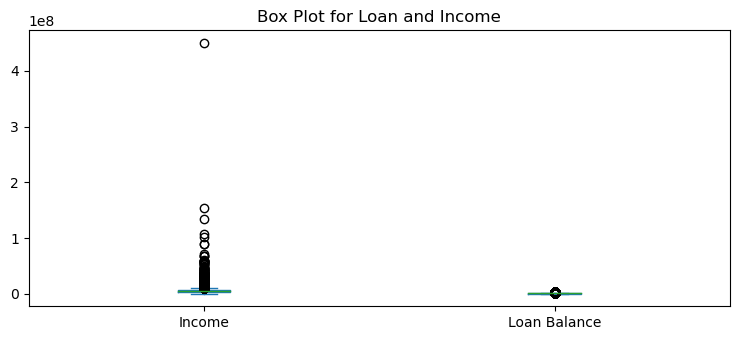

['',
 '#Import Essential Library\nimport numpy as np\nimport pandas as pd\nfrom scipy import stats\nimport matplotlib.pyplot as plt\nimport seaborn as sns',
 '#Load the dataset\ndata1=pd.read_csv(r"C:\\Users\\Shobhan Sarkar\\OneDrive\\Desktop\\to replicate\\Credit Risk using ML\\Loan_Data_RA.xlsx")\ndata1',
 '#Load the dataset\ndata1=pd.read_csv(r"C:\\\\Users\\\\Shobhan Sarkar\\\\OneDrive\\\\Desktop\\\\to replicate\\\\Credit Risk using ML\\\\Loan_Data_RA.xlsx")\ndata1',
 '#Load the dataset\ndata1=pd.read_csv(r"C:/Users/Shobhan Sarkar/OneDrive/Desktop/to replicate/Credit Risk using ML/Loan_Data_RA.xlsx")\ndata1',
 '#Load the dataset\ndata1=pd.read_csv(r"C:\\Users\\Shobhan Sarkar\\OneDrive\\Desktop\\to replicate\\Credit Risk using ML\\Loan_Data.csv")\ndata1',
 'data1.info()',
 '# Drop the customar id column because it is not necessary for our analysis\ndata1.drop("Cust_Id",axis=1,inplace=True)\ndata1',
 '#Check if there is som missing values there\ndata1.isnull()',
 '#Drop our missing va

In [14]:
#Plot Figure Size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
#Set the data frame
temp_data = pd.DataFrame({'Income': data2['Income'], 'Loan Balance': data2['Loan Balance']})
ax = temp_data[['Income','Loan Balance']].plot(kind='box', title='Box Plot for Loan and Income')
#Display the plot
plt.show()
In

{'whiskers': [<matplotlib.lines.Line2D at 0x22fca4be810>,
 'caps': [<matplotlib.lines.Line2D at 0x22fca4bfc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fca4bde90>],
 'medians': [<matplotlib.lines.Line2D at 0x22fca4d0e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fca4bc250>],
 'means': []}

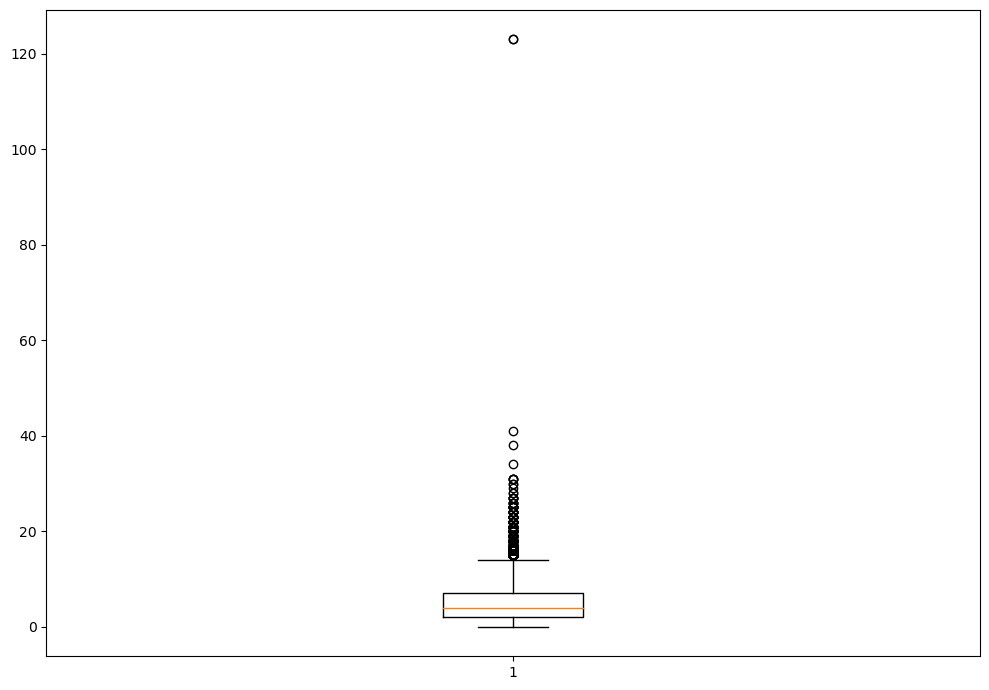

In [15]:
#Box plot for Job Experience
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data2['Job Experience'])

In [20]:
#Setting Inter Quertile Range
Q11 = np.percentile(data2['Loan Balance'], 25,interpolation = 'midpoint')
Q31 = np.percentile(data2['Loan Balance'], 75,interpolation = 'midpoint')
IQR1 = Q31 - Q11
#Setting up Lower and upper bound
# Upper bound
upper1 = Q31+1.5*IQR1
# Lower bound
lower1 = Q11-1.5*IQR1
data2 = data2[data2['Loan Balance'] <= upper1]
data2 = data2[data2['Loan Balance'] >= lower1]

In [21]:
import warnings
warnings.filterwarnings('ignore')
#Setting Inter Quertile Range
Q12 = np.percentile(data2['Income'], 25,
interpolation = 'midpoint')
Q32 = np.percentile(data2['Income'], 75,
interpolation = 'midpoint')
IQR2 = Q32 - Q12
#Setting up Lower and upper bound
# Upper bound
upper2 = Q32+1.5*IQR2
# Lower bound
lower2 = Q12-1.5*IQR2
data2 = data2[data2['Income'] <= upper2]
data2 = data2[data2['Income'] >= lower2]

In [22]:
import warnings
warnings.filterwarnings('ignore')
#Setting Inter Quertile Range
Q13 = np.percentile(data2['Age'], 5,interpolation = 'midpoint')
Q33 = np.percentile(data2['Age'], 95,interpolation = 'midpoint')
IQR3 = Q33 - Q13
#Setting up Lower and upper bound
# Upper bound
upper3 = Q33+1.5*IQR3
# Lower bound
lower3 = Q13-1.5*IQR3
data2 = data2[data2['Age'] <= upper3]
data2 = data2[data2['Age'] >= lower3]

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25620 entries, 1 to 32580
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         25620 non-null  object 
 1   Age              25620 non-null  int64  
 2   Car Ownership    25620 non-null  int64  
 3   Income           25620 non-null  int64  
 4   Home Type        25620 non-null  object 
 5   Job Experience   25620 non-null  float64
 6   Loan Purpose     25620 non-null  object 
 7   Loan Grade       25620 non-null  object 
 8   Loan Balance     25620 non-null  int64  
 9   Interest Rate    25620 non-null  float64
 10  loan_status      25620 non-null  int64  
 11  Default History  25620 non-null  object 
 12  Credit History   25620 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 2.7+ MB


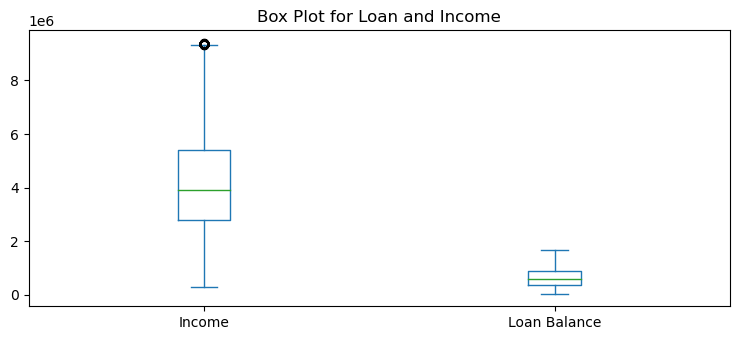

In [25]:
#Plot Figure Size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
#Set the data frame
temp_data = pd.DataFrame({'Income': data2['Income'], 'Loan Balance': data2['Loan Balance']})
ax = temp_data[['Income','Loan Balance']].plot(kind='box', title='Box Plot for Loan and Income')
#Display the plot
plt.show()

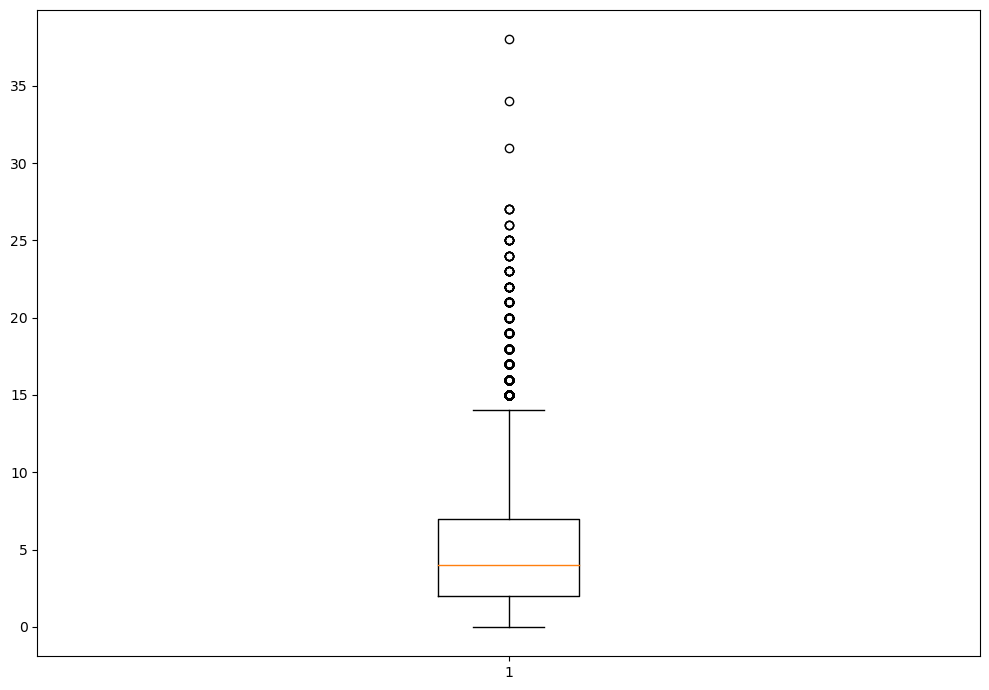

In [26]:
#Box plot for Job Experience
fig = plt.figure(figsize =(10, 7))
#Creating plot
plt.boxplot(data2['Job Experience'])
#show plot
plt.show()

In [30]:
#Saving Our Processed data in a CSV File
data2.to_csv(r'C:\Users\Shobhan Sarkar\OneDrive\Desktop\to replicate\Credit Risk using ML\final_data.csv')

# Exploratory Data Analysis

In [31]:
#Import Essential Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Load the dataset
data=pd.read_csv('final_data.csv')
data

,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,1,N,2
3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,1,N,3
4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,1,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25615,32574,Chennai,52,0,4875300,RENT,4.0,PERSONAL,D,1500000,15.58,1,Y,19
25616,32575,Bangalore,52,0,4837500,RENT,0.0,EDUCATION,B,375000,11.26,0,N,20
25617,32576,Hyderabad,57,0,3975000,MORTGAGE,1.0,PERSONAL,C,435000,13.16,0,N,30
25618,32577,Hyderabad,54,0,9000000,MORTGAGE,4.0,PERSONAL,A,1321875,7.49,0,N,19


In [33]:
#Drop Unnamed Column
data1 = data.drop(['Unnamed: 0'], axis = 1)

In [34]:
data1.describe()

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,loan_status,Credit History
count,25620.000000,25620.000000,2.562000e+04,25620.000000,2.562000e+04,25620.000000,25620.000000,25620.000000
mean,27.506323,0.501405,4.237580e+06,4.633763,6.398585e+05,10.945144,0.215496,5.682709
std,6.003304,0.500008,1.873284e+06,3.908806,3.672821e+05,3.193151,0.411174,3.958190
min,20.000000,0.000000,3.000000e+05,0.000000,3.750000e+04,5.420000,0.000000,2.000000
25%,23.000000,0.000000,2.775600e+06,2.000000,3.750000e+05,7.900000,0.000000,3.000000
50%,26.000000,1.000000,3.900750e+06,4.000000,5.700000e+05,10.990000,0.000000,4.000000
75%,30.000000,1.000000,5.400000e+06,7.000000,9.000000e+05,13.350000,0.000000,8.000000
max,66.000000,1.000000,9.403125e+06,38.000000,1.687500e+06,23.220000,1.000000,30.000000


In [35]:
df_good = data1[data1["Default History"] == 'N']

In [36]:
df_bad = data1[data1["Default History"] == 'Y']

In [37]:
df_good

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
1,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
2,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,1,N,2
3,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,1,N,3
4,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,1,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25614,Hyderabad,56,1,6750000,MORTGAGE,0.0,PERSONAL,A,540000,6.17,0,N,19
25616,Bangalore,52,0,4837500,RENT,0.0,EDUCATION,B,375000,11.26,0,N,20
25617,Hyderabad,57,0,3975000,MORTGAGE,1.0,PERSONAL,C,435000,13.16,0,N,30
25618,Hyderabad,54,0,9000000,MORTGAGE,4.0,PERSONAL,A,1321875,7.49,0,N,19


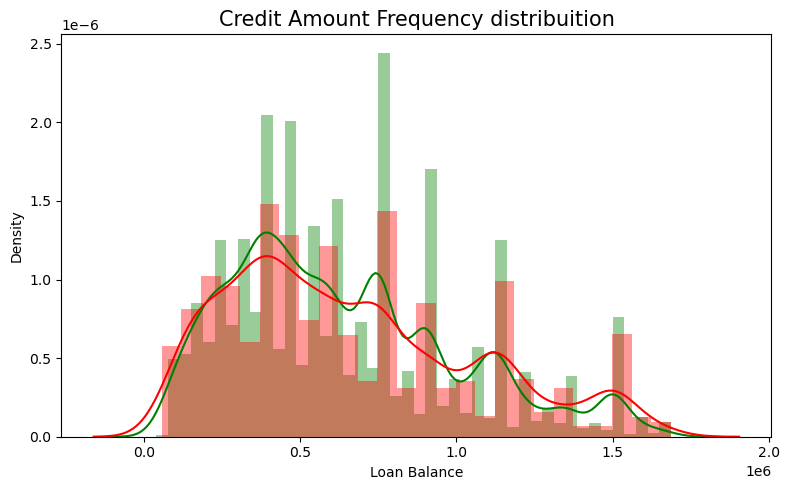

In [38]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (8,5))
g= sns.distplot(df_good["Loan Balance"], color='g')
g = sns.distplot(df_bad["Loan Balance"], color='r')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

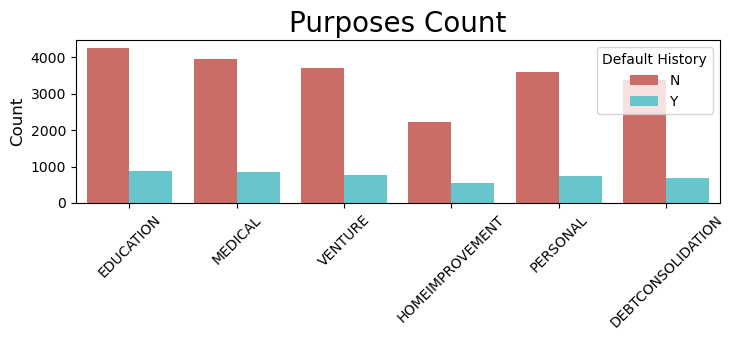

In [39]:
g = sns.countplot(x="Loan Purpose", data=data,
palette="hls", hue = "Default History")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)
plt.show()

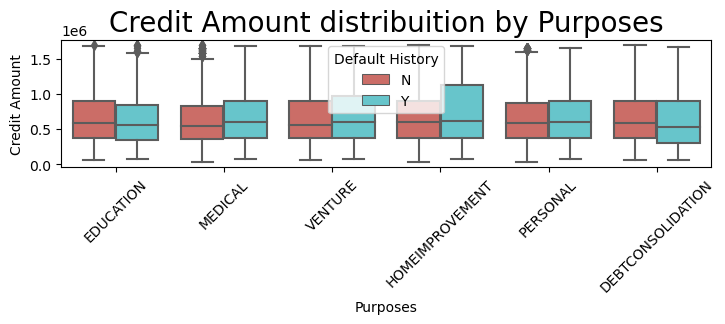

In [42]:
g2 = sns.boxplot(x="Loan Purpose", y="Loan Balance", data=data,
palette="hls", hue = "Default History")
g2.set_xlabel("Purposes", fontsize=10)
g2.set_ylabel("Credit Amount", fontsize=10)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Duration Frequency x good and bad Credit')

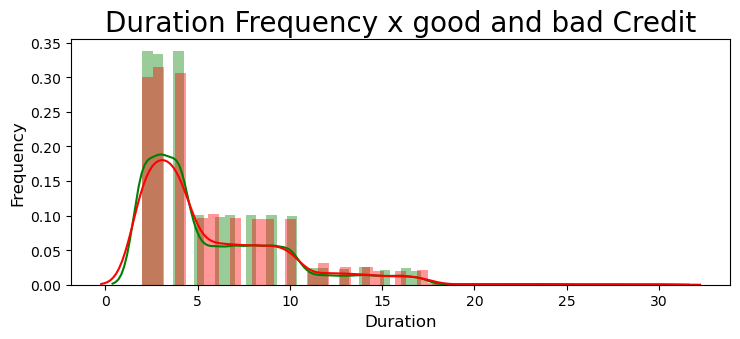

In [43]:
g2 = sns.distplot(df_good["Credit History"], color='g')
g2 = sns.distplot(df_bad["Credit History"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

In [45]:
# it's a library that we work with plotly
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
df_good = data.loc[data["Default History"] == 'N']['Age'].values.tolist()
df_bad = data.loc[data["Default History"] == 'Y']['Age'].values.tolist()
df_age = data['Age'].values.tolist()
#First plot
trace0 = go.Histogram(x=df_good,histnorm='probability',name="Good Credit")
#Second plot
trace1 = go.Histogram(x=df_bad,histnorm='probability',name="Bad Credit")
#Third plot
trace2 = go.Histogram(x=df_age,histnorm='probability',name="Overall Age")
#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],subplot_titles=('Good','Bad', 'General Distribuition'))
#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

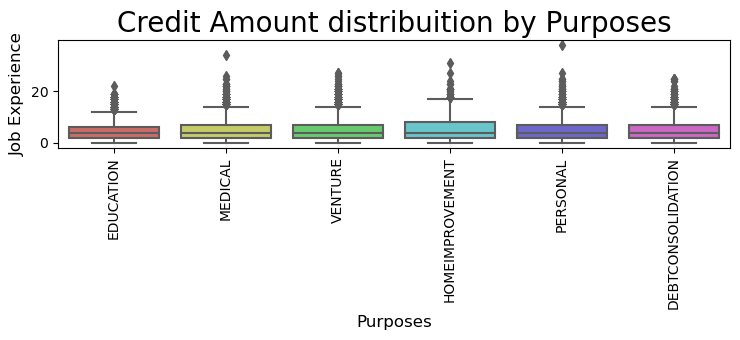

In [52]:
g2 = sns.boxplot(x="Loan Purpose", y="Job Experience", data=data,
palette="hls")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Job Experience", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)
plt.xticks(rotation=90)
plt.show()

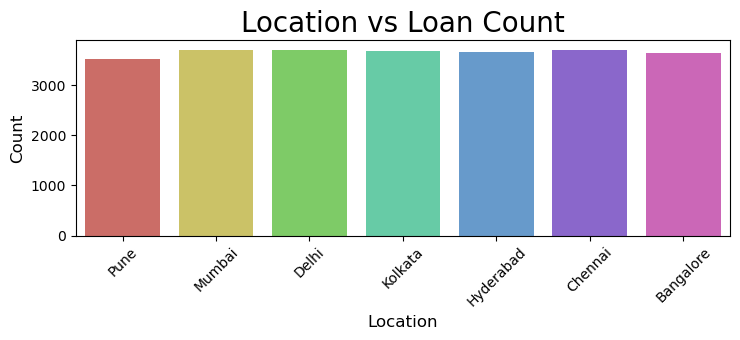

In [51]:
g = sns.countplot(x="Location", data=data,
palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Location", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Location vs Loan Count", fontsize=20)
plt.show()

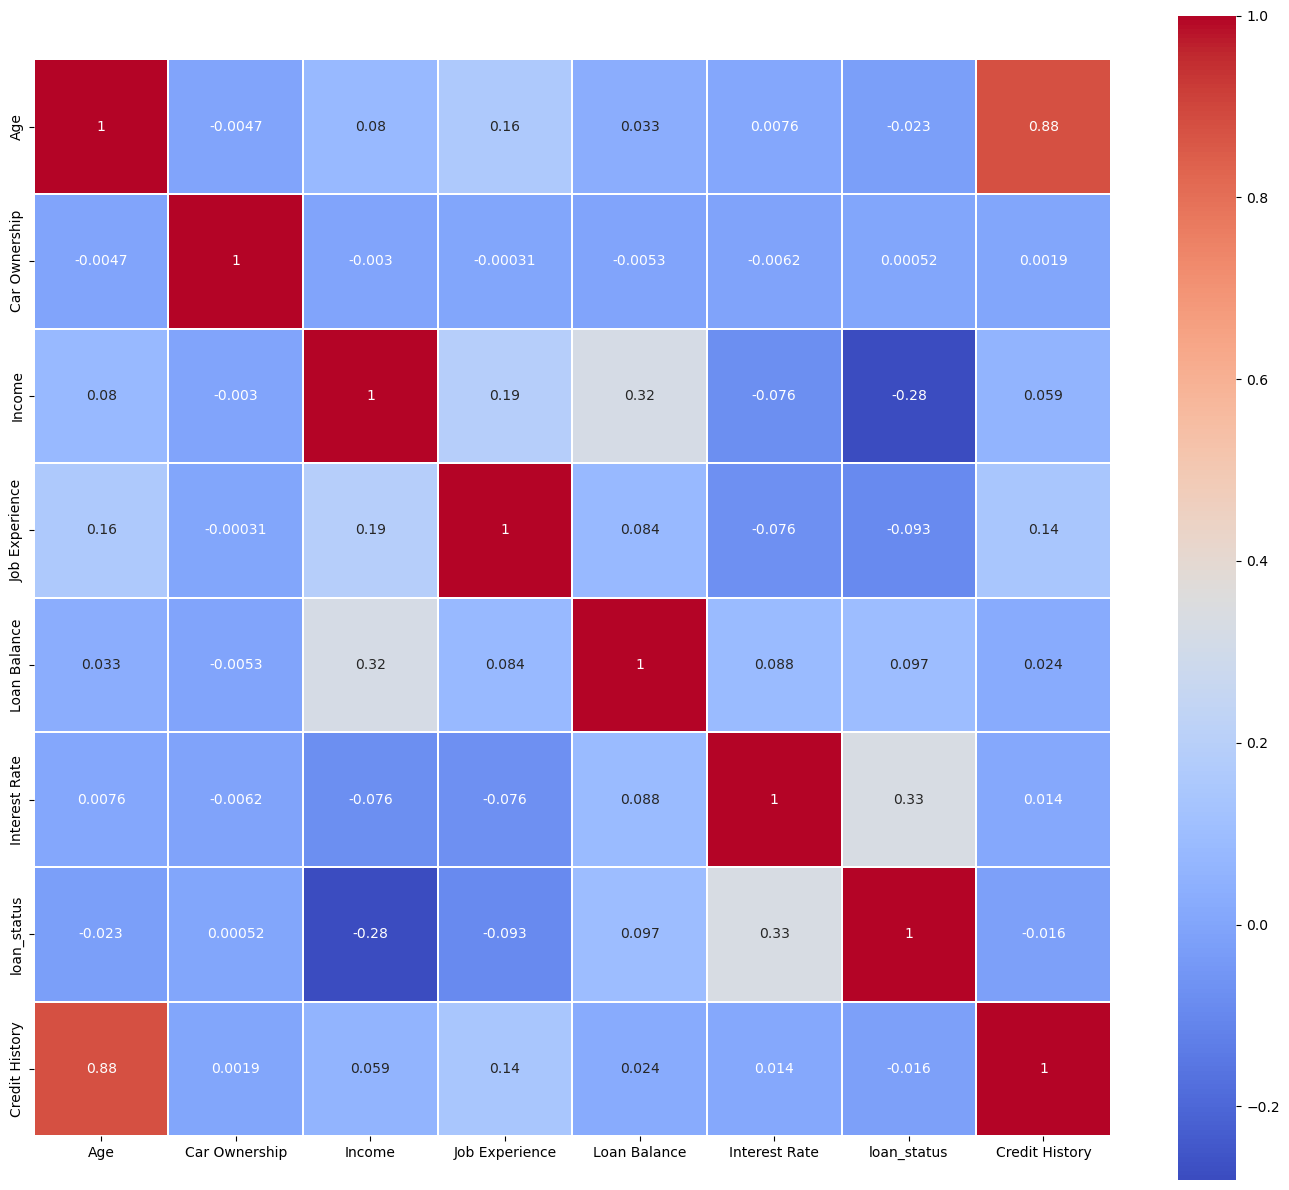

In [57]:
plt.figure(figsize=(14,12))
data_numeric = data1.select_dtypes('number')
sns.heatmap(data_numeric.corr(),linewidths=0.1,vmax=1.0,square=True, linecolor='white', cmap='coolwarm', annot=True)
plt.show()

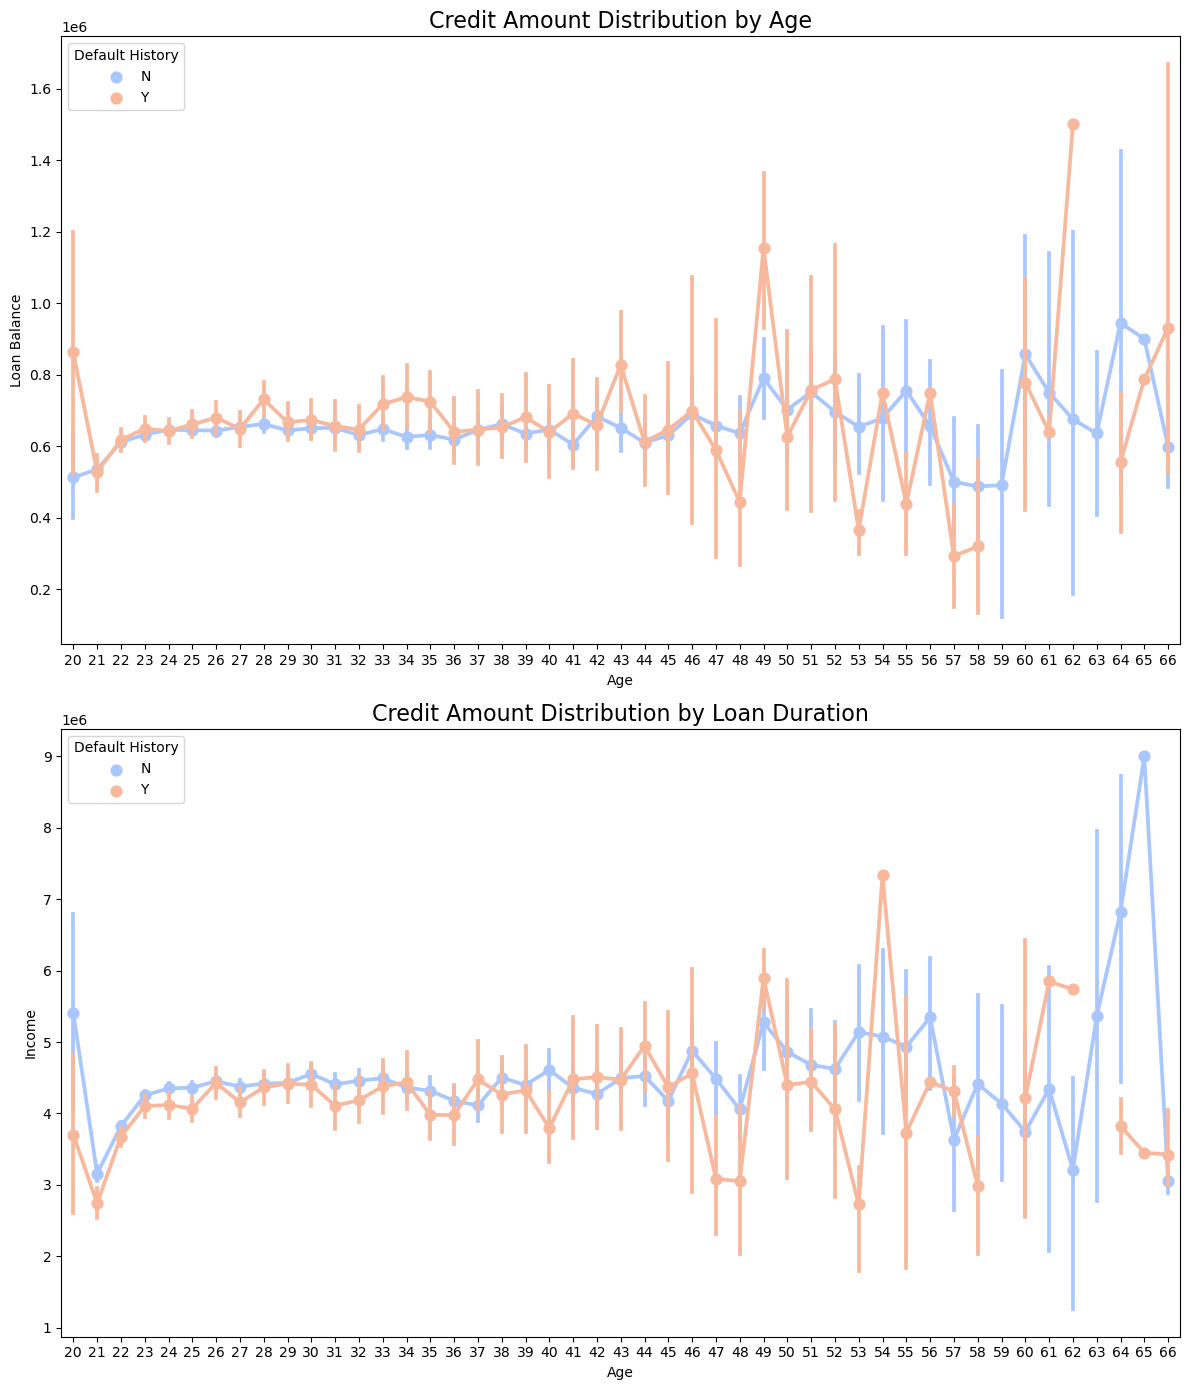

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

sns.pointplot(x="Age", y="Loan Balance", data=data1, hue="Default History", palette="coolwarm", ax=ax1)
sns.pointplot(x="Age", y="Income", data=data1, hue="Default History", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution by Age", fontsize=16)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)
plt.show()


In [62]:
# Ok we have to create for each group risky and non-risky loans.
data1['Age_Group'] = np.nan
lst = [data1]
for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder'
data1.head()

,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History,Age_Group
0,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2,Young
1,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3,Young
2,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,1,N,2,Young
3,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,1,N,3,Young
4,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,1,N,2,Young


In [63]:
data1.dtypes

Location            object
Age                  int64
Car Ownership        int64
Income               int64
Home Type           object
Job Experience     float64
Loan Purpose        object
Loan Grade          object
Loan Balance         int64
Interest Rate      float64
loan_status          int64
Default History     object
Credit History       int64
Age_Group           object
dtype: object

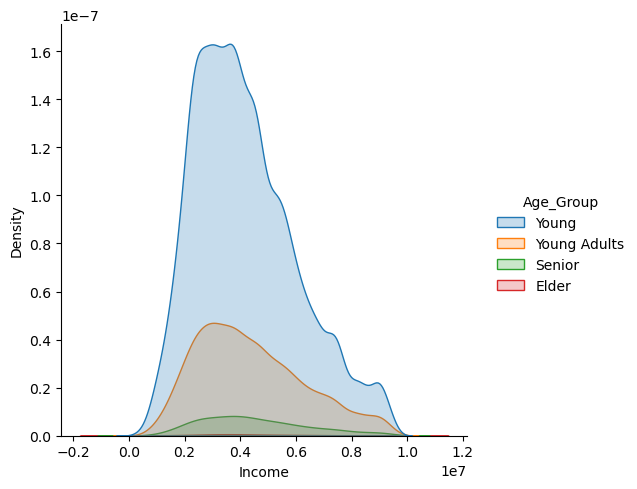

In [64]:
sns.displot(data=data1, x="Income", hue="Age_Group", kind="kde",fill= True)

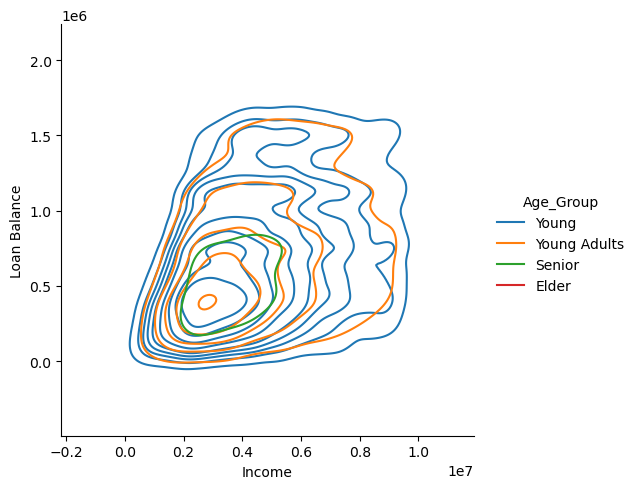

In [65]:
sns.displot(data=data1, x="Income", y="Loan Balance", hue="Age_Group", kind="kde")

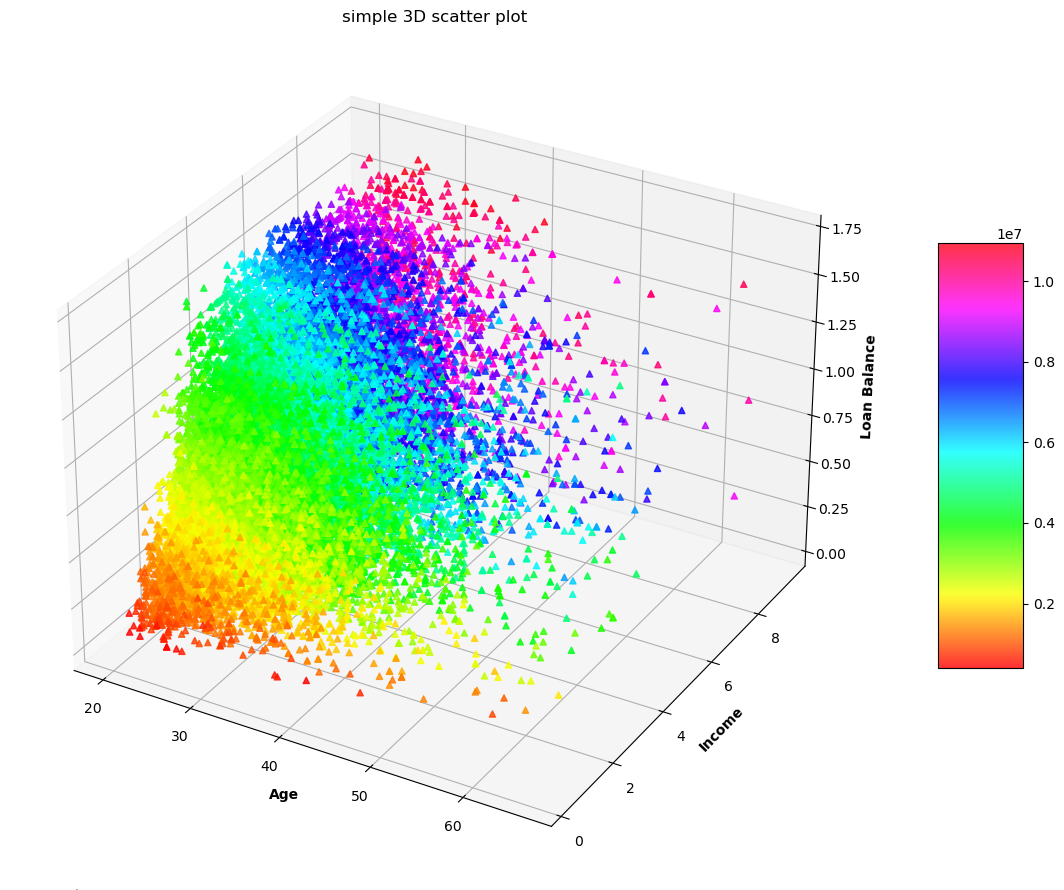

In [66]:
from mpl_toolkits import mplot3d
x=data1["Age"]
y=data1["Income"]
z =data1["Loan Balance"]
#Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
linestyle ='-.', linewidth = 0.3,
alpha = 0.2)
#Creating color map
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(x, y, z,
alpha = 0.8,
c = (x + y + z),
cmap = my_cmap,
marker ='^')
plt.title("simple 3D scatter plot")
ax.set_xlabel('Age', fontweight ='bold')
ax.set_ylabel('Income', fontweight ='bold')
ax.set_zlabel('Loan Balance', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

# Logistic Regression 

In [67]:
#Import Essential Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [68]:
#LOAD the DATASET
data=pd.read_csv('final_data.csv')
data

,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,1,N,2
3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,1,N,3
4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,1,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25615,32574,Chennai,52,0,4875300,RENT,4.0,PERSONAL,D,1500000,15.58,1,Y,19
25616,32575,Bangalore,52,0,4837500,RENT,0.0,EDUCATION,B,375000,11.26,0,N,20
25617,32576,Hyderabad,57,0,3975000,MORTGAGE,1.0,PERSONAL,C,435000,13.16,0,N,30
25618,32577,Hyderabad,54,0,9000000,MORTGAGE,4.0,PERSONAL,A,1321875,7.49,0,N,19


In [69]:
data["Default History"].replace(('Y', 'N'), (1, 0), inplace=True)
data.head()

,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,0,2
1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,0,3
2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,1,0,2
3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,1,0,3
4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,1,0,2


In [70]:
x = data.iloc[:, [2,3,4,6,9,10,12,13]].values
# output
y = data.iloc[:, 11].values

In [72]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10, random_state = 10)

In [73]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:24806, :])

[[-0.24845371 -1.00243161 -0.05997876 ... -1.30961451 -0.46027908
  -0.92910866]
 [ 0.91988096  0.99757428  0.3394173  ...  0.32687527 -0.46027908
   0.83937305]
 [-0.91607352  0.99757428  0.25953809 ... -0.92161311 -0.46027908
  -0.92910866]
 ...
 [ 0.4191661  -1.00243161 -1.33804616 ...  1.18110416 -0.46027908
   1.0920133 ]
 [-1.08297847  0.99757428 -0.85877089 ...  2.76752924  2.17259492
  -0.42382817]
 [ 1.25369087 -1.00243161  0.9385114  ... -1.1437752  -0.46027908
   0.58673281]]


In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=10)

In [75]:
y_pred = classifier.predict(xtest)

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1938   97]
 [ 324  203]]


In [77]:
#instantiate the model
log_regression = LogisticRegression()
#fit the model using the training data
log_regression.fit(xtrain,ytrain)

LogisticRegression()

In [78]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2035
           1       0.68      0.39      0.49       527

    accuracy                           0.84      2562
   macro avg       0.77      0.67      0.70      2562
weighted avg       0.82      0.84      0.82      2562



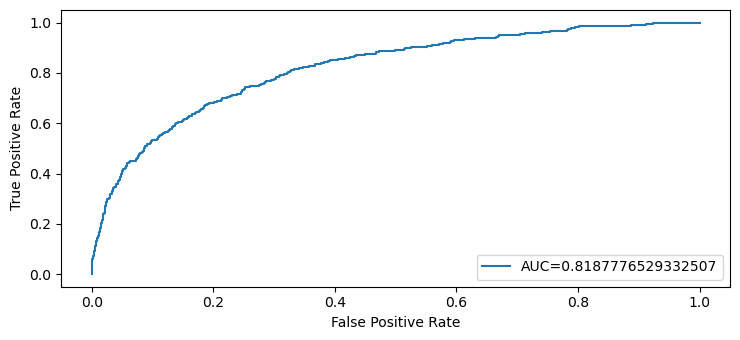

In [79]:
#define metrics
y_pred_proba = log_regression.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(ytest, y_pred))
print('Recall: %.3f' % recall_score(ytest, y_pred))
print('F1 Score: %.3f' % f1_score(ytest, y_pred))
print('Accuracy Score: %.3f' % accuracy_score(ytest, y_pred))

Precision: 0.677
Recall: 0.385
F1 Score: 0.491
Accuracy Score: 0.836


In [81]:
from tabulate import tabulate
mydata = [
["Accuracy Score:",('%.3f' % accuracy_score(ytest, y_pred))],
["Precision:", ('%.3f' % precision_score(ytest, y_pred))],
["Recall:", ('%.3f' % recall_score(ytest, y_pred))],
["F1 Score:",('%.3f' % f1_score(ytest, y_pred))]
]
# create header
head = ["Evaluation matrices", "Values"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------------------+----------+
| Evaluation matrices   |   Values |
+=======================+==========+
| Accuracy Score:       |    0.836 |
+-----------------------+----------+
| Precision:            |    0.677 |
+-----------------------+----------+
| Recall:               |    0.385 |
+-----------------------+----------+
| F1 Score:             |    0.491 |
+-----------------------+----------+


# 10 Fold Cross Validation

In [82]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=False)

for train_index, test_index in kfold.split(x):
    print("Train - \n", train_index, "\nTest - \n", test_index)
    print("=======\n")

Train - 
 [ 2562  2563  2564 ... 25617 25618 25619] 
Test - 
 [   0    1    2 ... 2559 2560 2561]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [2562 2563 2564 ... 5121 5122 5123]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [5124 5125 5126 ... 7683 7684 7685]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [ 7686  7687  7688 ... 10245 10246 10247]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [10248 10249 10250 ... 12807 12808 12809]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [12810 12811 12812 ... 15369 15370 15371]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [15372 15373 15374 ... 17931 17932 17933]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [17934 17935 17936 ... 20493 20494 20495]

Train - 
 [    0     1     2 ... 25617 25618 25619] 
Test - 
 [20496 20497 20498 ... 23055 23056 23057]

Train - 
 [    0     1     2 ... 23055 23056 23057] 
Test - 
 [23058 2305

In [91]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming you have already defined 'kfold', 'x', and 'y'

n_est = [100, 200, 500]

for n_estimator in n_est:
    error = []
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create a new LogisticRegression instance
        rf1 = LogisticRegression()

        # Fit the model to the training data
        rf1.fit(x_train, y_train)

        # Make predictions on the test data
        prediction = rf1.predict(x_test)

        # Calculate the mean squared error
        error.append(mean_squared_error(y_test, prediction))

    # Calculate the standard deviation
    std_deviation = np.std(error, ddof=1)  # ddof=1 for sample standard deviation

    print("Results for n_estimator:", n_estimator)
    print("Error:", error)
    print("Average Error =", sum(error) / len(error))
    print("Standard Deviation =", std_deviation)


Results for n_estimator: 100
Error: [0.2861046057767369, 0.1994535519125683, 0.17447306791569087, 0.16705698672911787, 0.15339578454332553, 0.2462919594067135, 0.195160031225605, 0.16120218579234974, 0.1643247462919594, 0.18462138953942234]
Average Error = 0.19320843091334897
Standard Deviation = 0.04221997091398427
Results for n_estimator: 200
Error: [0.2861046057767369, 0.1994535519125683, 0.17447306791569087, 0.16705698672911787, 0.15339578454332553, 0.2462919594067135, 0.195160031225605, 0.16120218579234974, 0.1643247462919594, 0.18462138953942234]
Average Error = 0.19320843091334897
Standard Deviation = 0.04221997091398427
Results for n_estimator: 500
Error: [0.2861046057767369, 0.1994535519125683, 0.17447306791569087, 0.16705698672911787, 0.15339578454332553, 0.2462919594067135, 0.195160031225605, 0.16120218579234974, 0.1643247462919594, 0.18462138953942234]
Average Error = 0.19320843091334897
Standard Deviation = 0.04221997091398427


In [95]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Assuming you have already defined 'kfold', 'x', and 'y'

n_est = [100, 200, 500]

for n_estimator in n_est:
    error = []
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create a new LogisticRegression instance
        rf1 = LogisticRegression()

        # Fit the model to the training data
        rf1.fit(x_train, y_train)

        # Make predictions on the test data
        prediction = rf1.predict(x_test)

        # Calculate the mean squared error
        error.append(mean_squared_error(y_test, prediction))

    # Calculate the average error
    avg_error = sum(error) / len(error)

    # Calculate the standard deviation
    std_deviation = np.std(error, ddof=1)  # ddof=1 for sample standard deviation

    print("Results for n_estimator:", n_estimator)
    print("Error:", error)
    print("Average Error =", avg_error)
    print("Standard Deviation =", std_deviation)


Results for n_estimator: 100
Error: [0.2861046057767369, 0.1994535519125683, 0.17447306791569087, 0.16705698672911787, 0.15339578454332553, 0.2462919594067135, 0.195160031225605, 0.16120218579234974, 0.1643247462919594, 0.18462138953942234]
Average Error = 0.19320843091334897
Standard Deviation = 0.04221997091398427
Results for n_estimator: 200
Error: [0.2861046057767369, 0.1994535519125683, 0.17447306791569087, 0.16705698672911787, 0.15339578454332553, 0.2462919594067135, 0.195160031225605, 0.16120218579234974, 0.1643247462919594, 0.18462138953942234]
Average Error = 0.19320843091334897
Standard Deviation = 0.04221997091398427
Results for n_estimator: 500
Error: [0.2861046057767369, 0.1994535519125683, 0.17447306791569087, 0.16705698672911787, 0.15339578454332553, 0.2462919594067135, 0.195160031225605, 0.16120218579234974, 0.1643247462919594, 0.18462138953942234]
Average Error = 0.19320843091334897
Standard Deviation = 0.04221997091398427


### OverSampling Technique:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,loan_status,Default History,Credit History
0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,N,2
1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,1,N,3
2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,1,N,2
3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,1,N,3
4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,1,N,2


In [3]:
data["loan_status"].value_counts()

loan_status
0    20099
1     5521
Name: count, dtype: int64

In [4]:
data.dtypes

Unnamed: 0           int64
Location            object
Age                  int64
Car Ownership        int64
Income               int64
Home Type           object
Job Experience     float64
Loan Purpose        object
Loan Grade          object
Loan Balance         int64
Interest Rate      float64
loan_status          int64
Default History     object
Credit History       int64
dtype: object

In [5]:
X= data.drop('loan_status',axis=1)
Y= data['loan_status']

In [6]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X,Y)

In [7]:
X_over

,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History
0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,N,2
1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,N,3
2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,N,2
3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,N,3
4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,21436,Pune,29,1,2430000,RENT,11.0,HOMEIMPROVEMENT,A,435000,5.79,N,5
40194,9190,Kolkata,25,1,1440000,RENT,3.0,VENTURE,B,375000,10.99,N,3
40195,3700,Mumbai,21,1,1425000,RENT,3.0,EDUCATION,C,300000,14.35,Y,3
40196,9831,Pune,26,0,2250000,RENT,0.0,DEBTCONSOLIDATION,D,675000,15.65,Y,4


In [8]:
Y_over.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40198 entries, 0 to 40197
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
40198 non-null  int64
dtypes: int64(1)
memory usage: 314.2 KB


In [9]:
df_model=X_over.merge(Y_over,left_index=True, right_index=True)

In [10]:
df_model

,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,N,2,0
1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,N,3,1
2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,N,2,1
3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,N,3,1
4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,21436,Pune,29,1,2430000,RENT,11.0,HOMEIMPROVEMENT,A,435000,5.79,N,5,1
40194,9190,Kolkata,25,1,1440000,RENT,3.0,VENTURE,B,375000,10.99,N,3,1
40195,3700,Mumbai,21,1,1425000,RENT,3.0,EDUCATION,C,300000,14.35,Y,3,1
40196,9831,Pune,26,0,2250000,RENT,0.0,DEBTCONSOLIDATION,D,675000,15.65,Y,4,1


In [11]:
df_model["loan_status"].value_counts()

loan_status
0    20099
1    20099
Name: count, dtype: int64

In [12]:
df_model.to_csv('df_model.csv')

### Logistics Regression after Oversampling:

In [13]:
#Import Essential Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [14]:
#LOAD the DATASET
data=pd.read_csv('df_model.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,N,2,0
1,1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,N,3,1
2,2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,N,2,1
3,3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,N,3,1
4,4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,N,2,1


In [15]:
data["Default History"].replace(('Y', 'N'), (1, 0), inplace=True)
data

C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_27804\1672817861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Default History"].replace(('Y', 'N'), (1, 0), inplace=True)
C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_27804\1672817861.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

,Unnamed: 0.1,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,2,0
1,1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,0,3,1
2,2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,0,2,1
3,3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,0,3,1
4,4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,40193,21436,Pune,29,1,2430000,RENT,11.0,HOMEIMPROVEMENT,A,435000,5.79,0,5,1
40194,40194,9190,Kolkata,25,1,1440000,RENT,3.0,VENTURE,B,375000,10.99,0,3,1
40195,40195,3700,Mumbai,21,1,1425000,RENT,3.0,EDUCATION,C,300000,14.35,1,3,1
40196,40196,9831,Pune,26,0,2250000,RENT,0.0,DEBTCONSOLIDATION,D,675000,15.65,1,4,1


In [16]:
x = data.iloc[:, [3,4,5,7,10,11,12,13]].values
# output
y = data.iloc[:, 14].values
x

array([[2.100e+01, 1.000e+00, 7.200e+05, ..., 1.114e+01, 0.000e+00,
        2.000e+00],
       [2.500e+01, 1.000e+00, 7.200e+05, ..., 1.287e+01, 0.000e+00,
        3.000e+00],
       [2.100e+01, 1.000e+00, 7.425e+05, ..., 7.140e+00, 0.000e+00,
        2.000e+00],
       ...,
       [2.100e+01, 1.000e+00, 1.425e+06, ..., 1.435e+01, 1.000e+00,
        3.000e+00],
       [2.600e+01, 0.000e+00, 2.250e+06, ..., 1.565e+01, 1.000e+00,
        4.000e+00],
       [2.100e+01, 0.000e+00, 2.250e+06, ..., 1.645e+01, 1.000e+00,
        2.000e+00]])

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
x, y, test_size = 0.20, random_state = 10)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print (xtrain[0:24806, :])

[[-0.72616344  1.00174292  0.84576026 ...  0.64003528  1.86968876
  -0.66014471]
 [-0.56039737  1.00174292  1.70542592 ... -0.53505974 -0.53484838
  -0.91190503]
 [-1.05769558 -0.99826011  0.23171336 ...  1.51091787 -0.53484838
  -0.40838439]
 ...
 [-0.89192951  1.00174292  0.35452274 ... -1.2568186  -0.53484838
  -0.40838439]
 [-0.72616344  1.00174292  0.26036888 ... -0.31435661 -0.53484838
  -0.40838439]
 [ 0.43419906  1.00174292  0.55920504 ...  0.08529499 -0.53484838
   0.59865688]]


In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=10)

In [20]:
y_pred = classifier.predict(xtest)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2962 1067]
 [ 975 3036]]


In [22]:
log_regression = LogisticRegression()
#fit the model using the training data
log_regression.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      4029
           1       0.74      0.76      0.75      4011

    accuracy                           0.75      8040
   macro avg       0.75      0.75      0.75      8040
weighted avg       0.75      0.75      0.75      8040



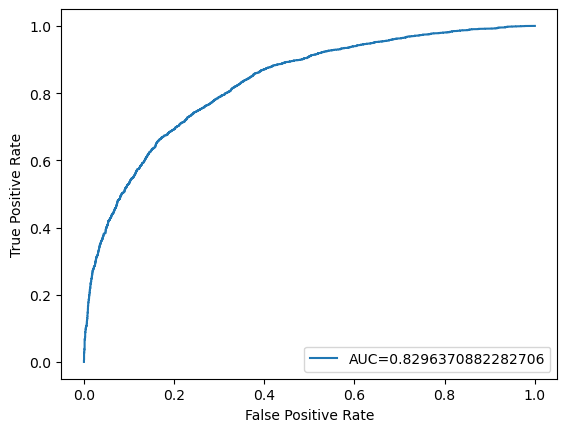

In [24]:
#define metrics
y_pred_proba = log_regression.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(ytest, y_pred))
print('Recall: %.3f' % recall_score(ytest, y_pred))
print('F1 Score: %.3f' % f1_score(ytest, y_pred))
print('Accuracy Score: %.3f' % accuracy_score(ytest, y_pred))



Precision: 0.740
Recall: 0.757
F1 Score: 0.748
Accuracy Score: 0.746


In [29]:
from tabulate import tabulate
mydata = [
["Accuracy Score:",('%.3f' % accuracy_score(ytest, y_pred))],
["Precision:", ('%.3f' % precision_score(ytest, y_pred))],
["Recall:", ('%.3f' % recall_score(ytest, y_pred))],
["F1 Score:",('%.3f' % f1_score(ytest, y_pred))]
]
# create header
head = ["Evaluation matrices", "Values"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------------------+----------+
| Evaluation matrices   |   Values |
+=======================+==========+
| Accuracy Score:       |    0.746 |
+-----------------------+----------+
| Precision:            |    0.74  |
+-----------------------+----------+
| Recall:               |    0.757 |
+-----------------------+----------+
| F1 Score:             |    0.748 |
+-----------------------+----------+


### K Nearest Neighbours:

In [30]:
#Import Essential Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#LOAD the DATASET
data=pd.read_csv('df_model.csv')
data

,Unnamed: 0.1,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,N,2,0
1,1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,N,3,1
2,2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,N,2,1
3,3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,N,3,1
4,4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,40193,21436,Pune,29,1,2430000,RENT,11.0,HOMEIMPROVEMENT,A,435000,5.79,N,5,1
40194,40194,9190,Kolkata,25,1,1440000,RENT,3.0,VENTURE,B,375000,10.99,N,3,1
40195,40195,3700,Mumbai,21,1,1425000,RENT,3.0,EDUCATION,C,300000,14.35,Y,3,1
40196,40196,9831,Pune,26,0,2250000,RENT,0.0,DEBTCONSOLIDATION,D,675000,15.65,Y,4,1


In [32]:
data["Default History"].replace(('Y', 'N'), (1, 0), inplace=True)
data

C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_27804\1672817861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Default History"].replace(('Y', 'N'), (1, 0), inplace=True)
C:\Users\Shobhan Sarkar\AppData\Local\Temp\ipykernel_27804\1672817861.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

,Unnamed: 0.1,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,0,2,0
1,1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,0,3,1
2,2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,0,2,1
3,3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,0,3,1
4,4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,40193,21436,Pune,29,1,2430000,RENT,11.0,HOMEIMPROVEMENT,A,435000,5.79,0,5,1
40194,40194,9190,Kolkata,25,1,1440000,RENT,3.0,VENTURE,B,375000,10.99,0,3,1
40195,40195,3700,Mumbai,21,1,1425000,RENT,3.0,EDUCATION,C,300000,14.35,1,3,1
40196,40196,9831,Pune,26,0,2250000,RENT,0.0,DEBTCONSOLIDATION,D,675000,15.65,1,4,1


In [34]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Location', 'Age', 'Car Ownership',
       'Income', 'Home Type', 'Job Experience', 'Loan Purpose', 'Loan Grade',
       'Loan Balance', 'Interest Rate', 'Default History', 'Credit History',
       'loan_status'],
      dtype='object')

In [35]:
data1 = data[['Age', 'Car Ownership', 'Income',"Job Experience","Loan Balance", "Interest Rate","Default History","Credit History","loan_status"]]
data1       

,Age,Car Ownership,Income,Job Experience,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,21,1,720000,5.0,75000,11.14,0,2,0
1,25,1,720000,1.0,412500,12.87,0,3,1
2,21,1,742500,2.0,187500,7.14,0,2,1
3,21,1,750000,6.0,120000,14.74,0,3,1
4,21,1,750000,2.0,337500,8.63,0,2,1
...,...,...,...,...,...,...,...,...,...
40193,29,1,2430000,11.0,435000,5.79,0,5,1
40194,25,1,1440000,3.0,375000,10.99,0,3,1
40195,21,1,1425000,3.0,300000,14.35,1,3,1
40196,26,0,2250000,0.0,675000,15.65,1,4,1


In [36]:
X = data1.iloc[:, :-1].values
y = data1.iloc[:, 8].values

In [37]:
from sklearn.model_selection import train_test_split ##Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)

In [38]:
from sklearn.preprocessing import StandardScaler ##Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_pred))

[[3112  917]
 [ 301 3710]]


In [42]:
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      4029
           1       0.80      0.92      0.86      4011

    accuracy                           0.85      8040
   macro avg       0.86      0.85      0.85      8040
weighted avg       0.86      0.85      0.85      8040



0.8485074626865672

In [44]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error Rate vs K')

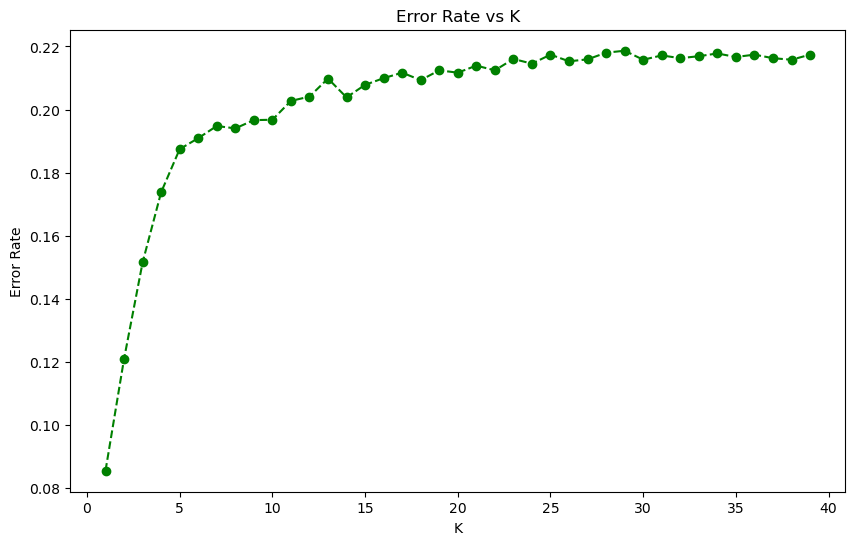

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color="green",linestyle="dashed",marker="o")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")

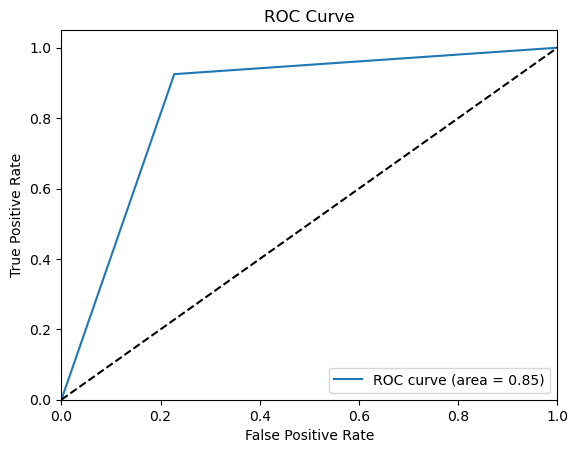

In [46]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy Score: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.802
Recall: 0.925
F1 Score: 0.859
Accuracy Score: 0.849


In [48]:
from tabulate import tabulate
mydata = [
["Accuracy Score:",('%.3f' % accuracy_score(y_test, y_pred))],
["Precision:", ('%.3f' % precision_score(y_test, y_pred))],
["Recall:", ('%.3f' % recall_score(y_test, y_pred))],
["F1 Score:",('%.3f' % f1_score(y_test, y_pred))]
]
# create header
head = ["Evaluation matrices", "Values"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------------------+----------+
| Evaluation matrices   |   Values |
+=======================+==========+
| Accuracy Score:       |    0.849 |
+-----------------------+----------+
| Precision:            |    0.802 |
+-----------------------+----------+
| Recall:               |    0.925 |
+-----------------------+----------+
| F1 Score:             |    0.859 |
+-----------------------+----------+


### Naive Bayes:

In [49]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into train
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import plotly.express as px # for data visualization
import plotly.graph_objects as go # for data visualization
# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB

In [50]:
data=pd.read_csv('df_model.csv')
data

,Unnamed: 0.1,Unnamed: 0,Location,Age,Car Ownership,Income,Home Type,Job Experience,Loan Purpose,Loan Grade,Loan Balance,Interest Rate,Default History,Credit History,loan_status
0,0,1,Pune,21,1,720000,OWN,5.0,EDUCATION,B,75000,11.14,N,2,0
1,1,2,Mumbai,25,1,720000,MORTGAGE,1.0,MEDICAL,C,412500,12.87,N,3,1
2,2,5,Pune,21,1,742500,OWN,2.0,VENTURE,A,187500,7.14,N,2,1
3,3,9,Delhi,21,1,750000,OWN,6.0,VENTURE,D,120000,14.74,N,3,1
4,4,11,Pune,21,1,750000,OWN,2.0,HOMEIMPROVEMENT,A,337500,8.63,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40193,40193,21436,Pune,29,1,2430000,RENT,11.0,HOMEIMPROVEMENT,A,435000,5.79,N,5,1
40194,40194,9190,Kolkata,25,1,1440000,RENT,3.0,VENTURE,B,375000,10.99,N,3,1
40195,40195,3700,Mumbai,21,1,1425000,RENT,3.0,EDUCATION,C,300000,14.35,Y,3,1
40196,40196,9831,Pune,26,0,2250000,RENT,0.0,DEBTCONSOLIDATION,D,675000,15.65,Y,4,1


In [54]:
#Function that handles sample splitting, model fitting and report printing
def mfunc(X, y, typ):
# Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Fit the model
    model = typ
    clf = model.fit(X_train, y_train)
# Predict class labels on a test data
    pred_labels = model.predict(X_test)
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else:
        print('Class Log Priors: ',clf.class_log_prior_)
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
# Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
# Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

In [55]:
# Select data for modeling
X=data[['Income', 'Loan Balance']]
y=data['loan_status'].values
# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.49844102 0.50155898]
--------------------------------------------------------
Accuracy Score:  0.6628855721393034
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.55      0.62      5072
           1       0.63      0.78      0.70      4978

    accuracy                           0.66     10050
   macro avg       0.67      0.66      0.66     10050
weighted avg       0.67      0.66      0.66     10050



In [56]:
# Select data for modeling
X=data[['Loan Balance','Interest Rate']]
y=data['loan_status'].values
# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.49844102 0.50155898]
--------------------------------------------------------
Accuracy Score:  0.5688557213930349
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.77      0.64      5072
           1       0.61      0.36      0.45      4978

    accuracy                           0.57     10050
   macro avg       0.58      0.57      0.55     10050
weighted avg       0.58      0.57      0.55     10050



In [57]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [58]:
Y_gnb_score = gnb.predict_proba(X_test)
Y_gnb_score

array([[0.51062643, 0.48937357],
       [0.51377338, 0.48622662],
       [0.38885895, 0.61114105],
       ...,
       [0.54816655, 0.45183345],
       [0.50061756, 0.49938244],
       [0.55891601, 0.44108399]])

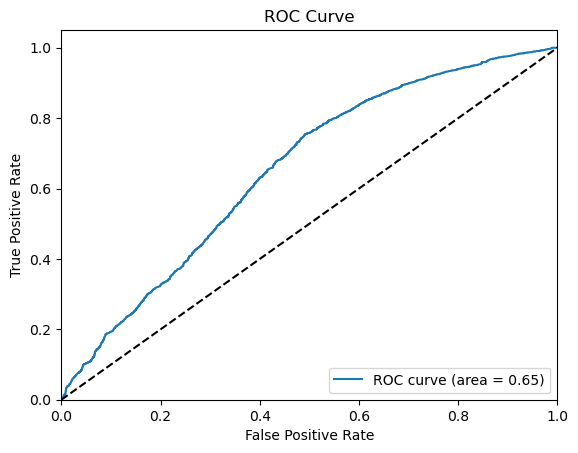

In [59]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_gnb_score[:, 1])
roc_auc=auc(fpr_gnb,tpr_gnb)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr_gnb, tpr_gnb, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test,pred_labels))
print('Recall: %.3f' % recall_score(y_test, pred_labels))
print('F1 Score: %.3f' % f1_score(y_test, pred_labels))
print('Accuracy Score: %.3f' % accuracy_score(y_test,pred_labels))

Precision: 0.609
Recall: 0.361
F1 Score: 0.453
Accuracy Score: 0.569


In [62]:
from tabulate import tabulate
mydata = [
    ["Accuracy Score:",('%.3f' % accuracy_score(y_test,pred_labels))],
    ["Precision:", ('%.3f' % precision_score(y_test,pred_labels))],
    ["Recall:", ('%.3f' % recall_score(y_test,pred_labels))],
    ["F1 Score:",('%.3f' % f1_score(y_test,pred_labels))]
    ]

# create header
head = ["Evaluation matrices", "Values"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------------------+----------+
| Evaluation matrices   |   Values |
+=======================+==========+
| Accuracy Score:       |    0.569 |
+-----------------------+----------+
| Precision:            |    0.609 |
+-----------------------+----------+
| Recall:               |    0.361 |
+-----------------------+----------+
| F1 Score:             |    0.453 |
+-----------------------+----------+
